The series of the DV (Data Visualization) notebooks is going to be used to visualize the normalized data of each of the training, validation, and testing dataset of each experiment.

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

**Importing Data**

In [ ]:
df=pd.read_csv('Final_DataSet_10k.csv', index_col='date', parse_dates=['date'])
df['Close']=df['close'].shift(-1,fill_value=0)
df.drop(df.tail(1).index,inplace=True)
df = df.drop(columns=['close'])

df

,open,high,low,Volume BTC,Volume USDT,Close
date,,,,,,
2017-08-17 04:00:00,16199.91,16199.91,4261.32,44.5100,190952.85,4315.32
2017-08-17 05:00:00,4308.83,4328.69,4291.37,23.2300,100304.82,4324.35
2017-08-17 06:00:00,4315.32,4345.45,4309.37,7.2300,31282.31,4349.99
2017-08-17 07:00:00,4324.35,4349.99,4287.41,4.4400,19241.06,4360.69
2017-08-17 08:00:00,4349.99,4377.85,4333.32,0.9499,4139.70,4444.00
...,...,...,...,...,...,...
2018-10-07 18:00:00,6589.18,6598.00,6589.18,175.4700,1157235.59,6584.00
2018-10-07 19:00:00,6594.27,6599.00,6579.01,223.6100,1473657.80,6587.20
2018-10-07 20:00:00,6584.00,6587.90,6579.01,164.6800,1084241.92,6588.54


**Data Partitioning**

In [ ]:
train_size = int(len(df)*0.7)
validation_size= int(len(df)*0.9)
train_dataset,validation_dataset,test_dataset = df.iloc[:train_size],df.iloc[train_size:validation_size],df.iloc[validation_size:]

**Plotting Data**

Volume of all data:  9999
Volume of train data:  6999
Volume of validation data: 2000
Volume of test data:  1000


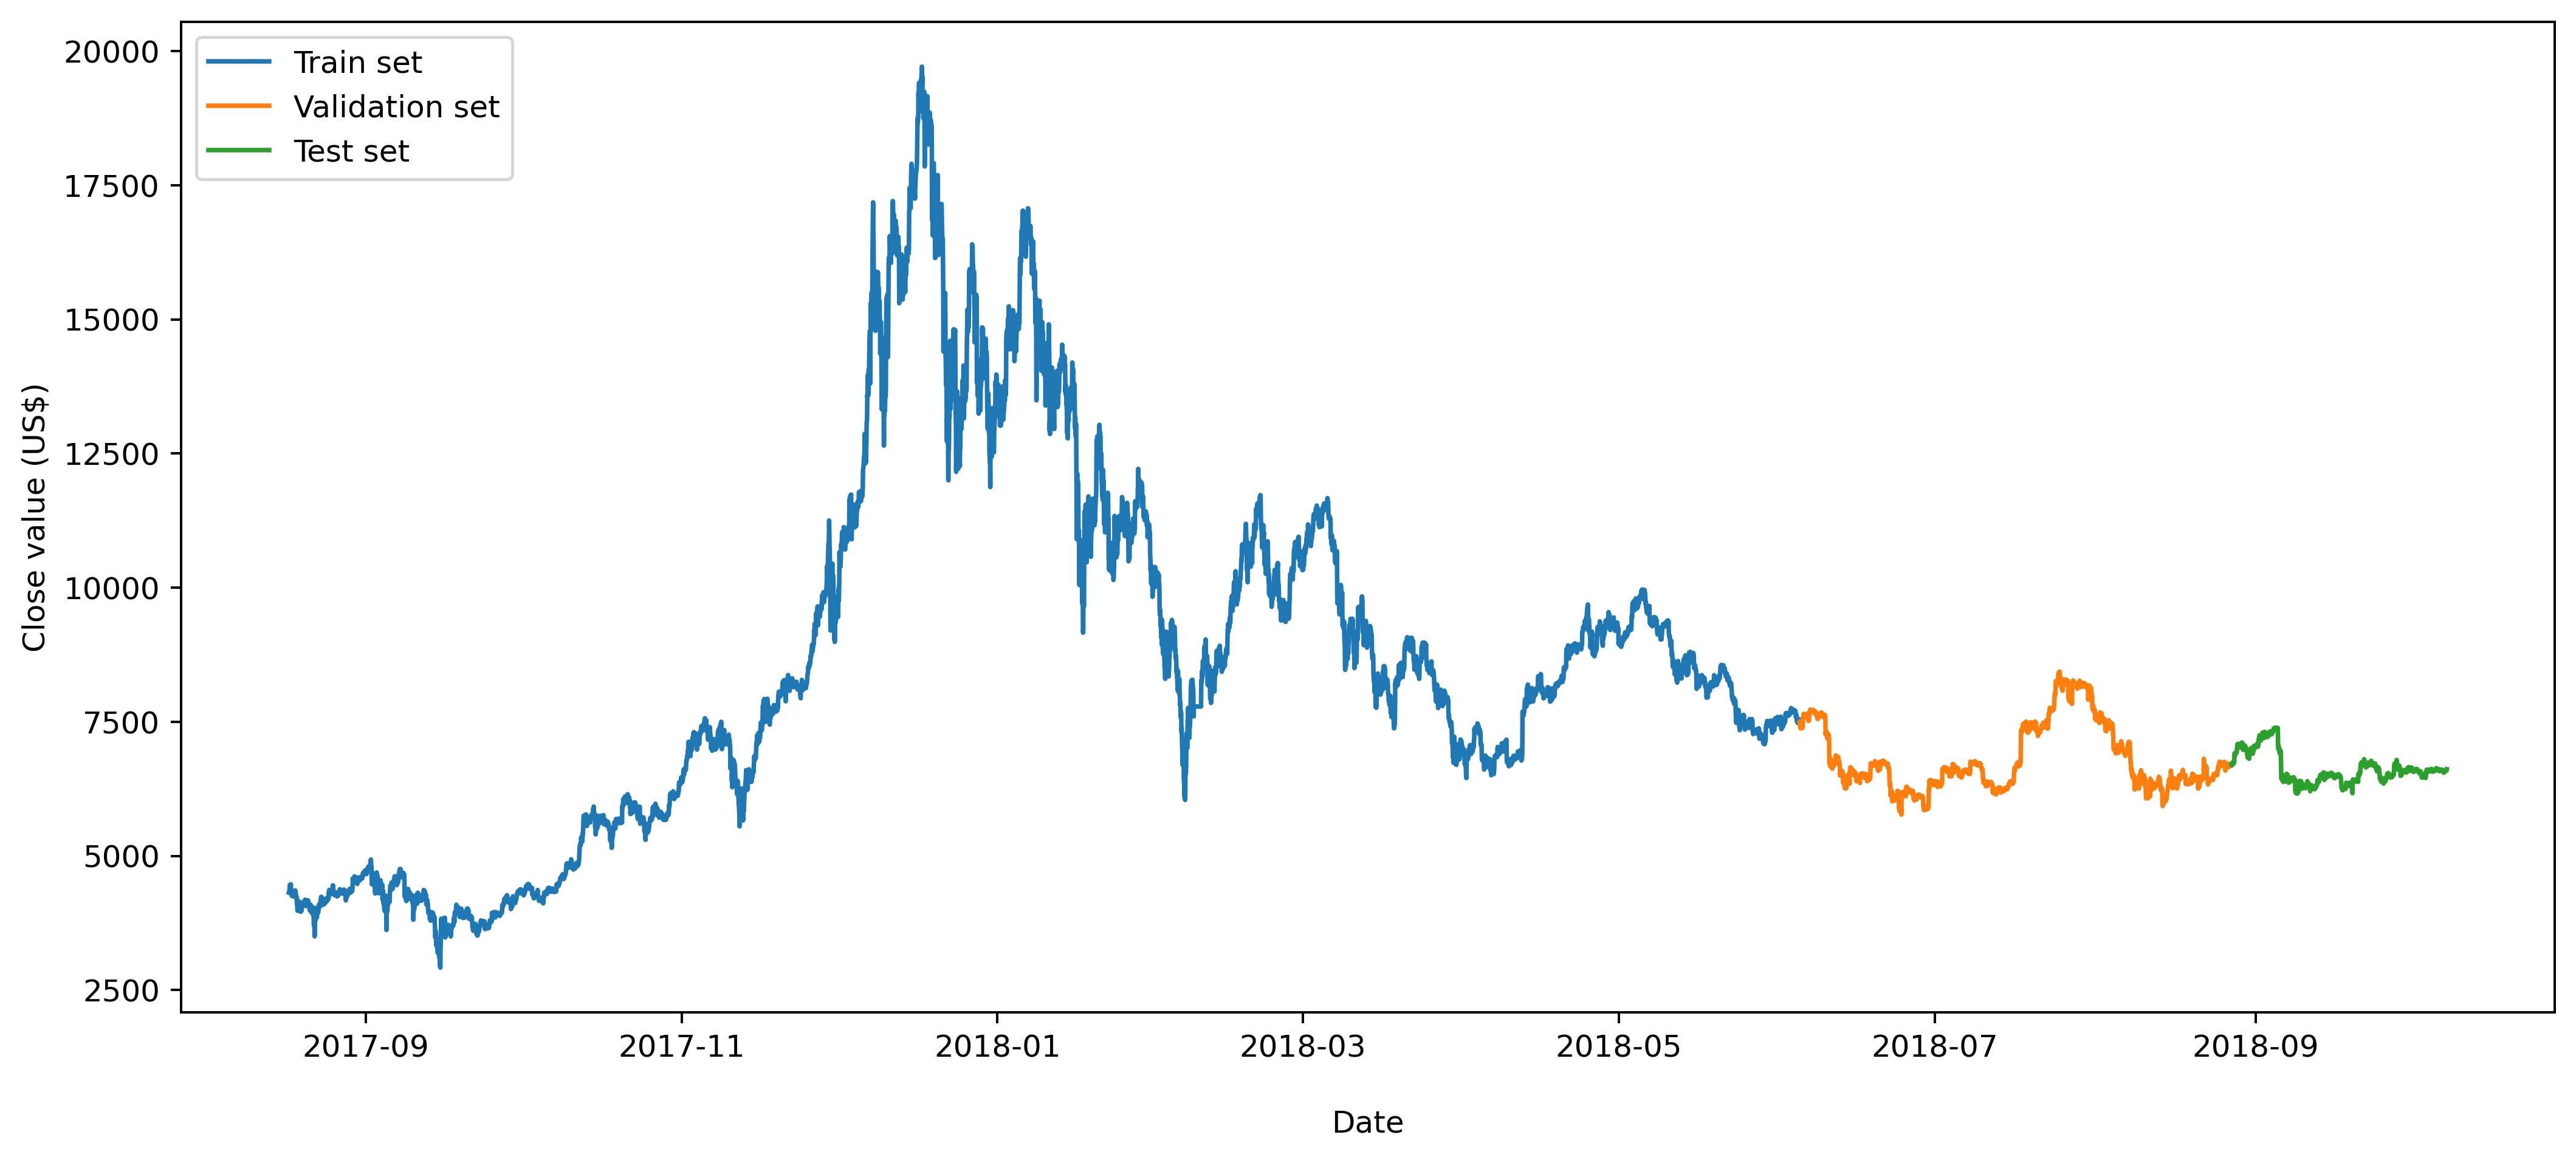

In [ ]:
plt.figure(figsize = (14, 6))
plt.rcParams['figure.dpi'] = 360
plt.plot(train_dataset.Close)
plt.plot(validation_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel('\nDate')
plt.ylabel('Close value (US$)')
plt.legend(['Train set', 'Validation set', 'Test set'], loc='upper left')
print('Volume of all data: ',len(df))
print('Volume of train data: ', len(train_dataset))
print('Volume of validation data:', len(validation_dataset))
print('Volume of test data: ', len(test_dataset))

**Data Normalization**

DO NOT USE THIS WAY TO NORMALIZE DATA FOR MODELS!!!

In [ ]:
df_norm = df.copy()
scaler = MinMaxScaler(feature_range=(0,1))

df_norm['Close'] = scaler.fit_transform(df[['Close']])
df_norm['open'] = scaler.fit_transform(df_norm[['open']])
df_norm['high'] = scaler.fit_transform(df_norm[['high']])
df_norm['low'] = scaler.fit_transform(df_norm[['low']])
df_norm['Volume BTC'] = scaler.fit_transform(df_norm[['Volume BTC']])
df_norm['Volume USDT'] = scaler.fit_transform(df_norm[['Volume USDT']])

**Plotting Normalized Data**

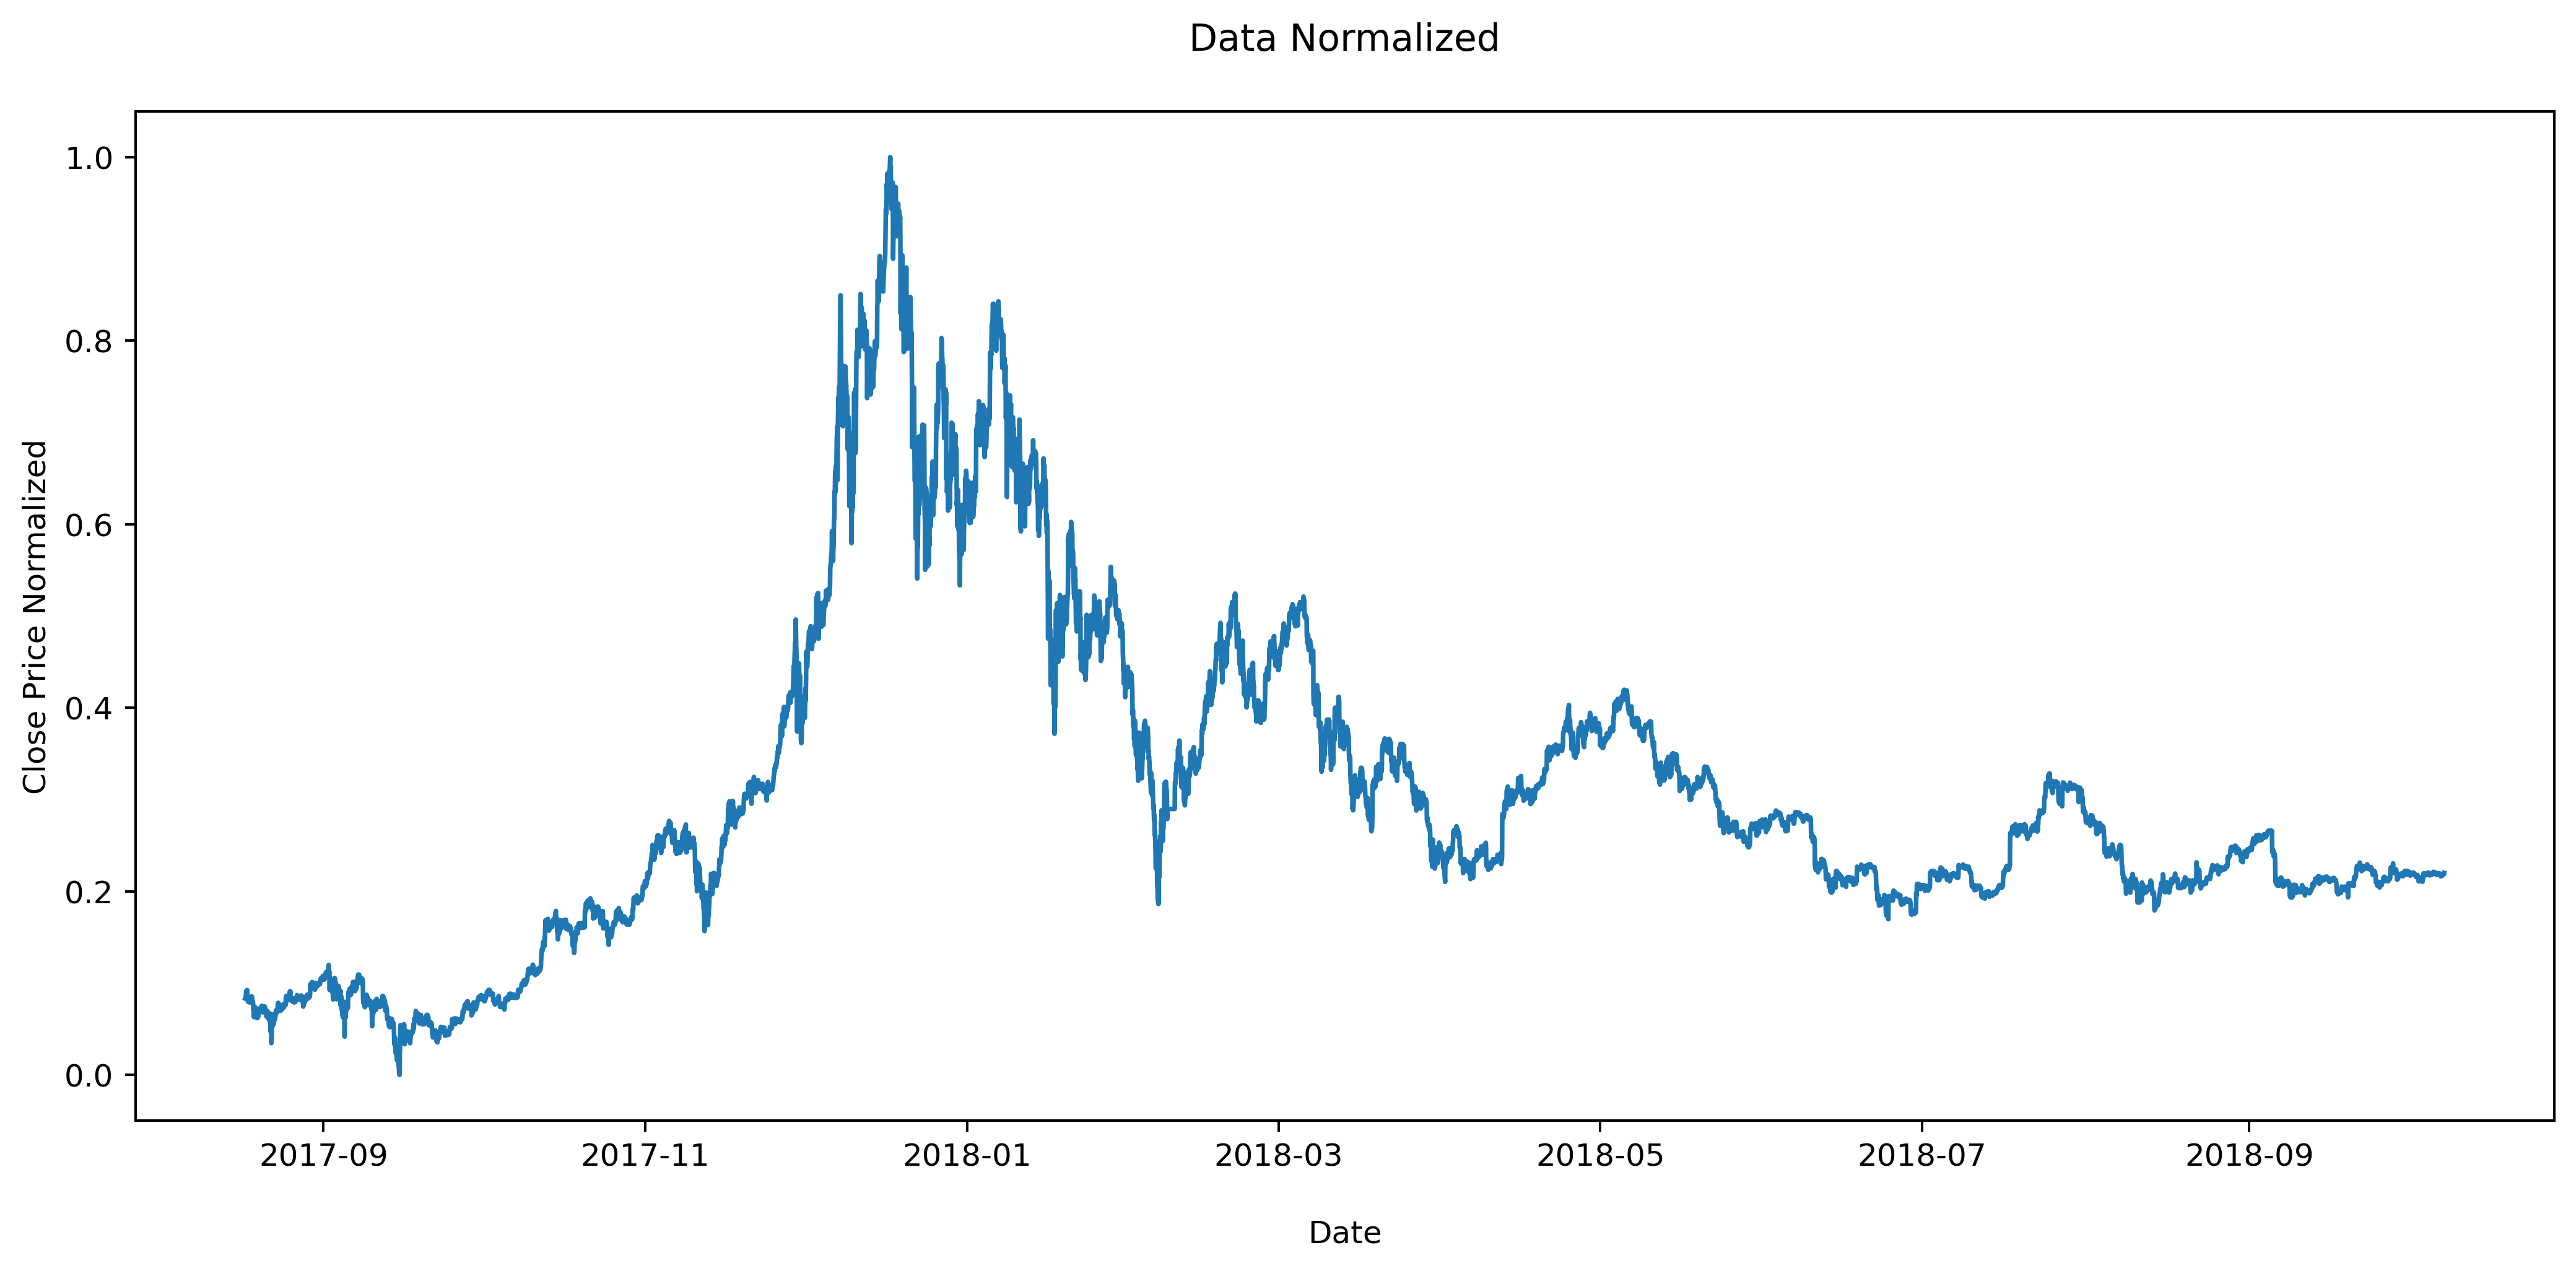

In [ ]:
fig = plt.figure(figsize=(14, 6))
plt.plot(df_norm.Close)
plt.xlabel('\nDate')
plt.ylabel('Close Price Normalized')
plt.title('Data Normalized\n')
plt.show()

**Plotting Normalized Training Data**

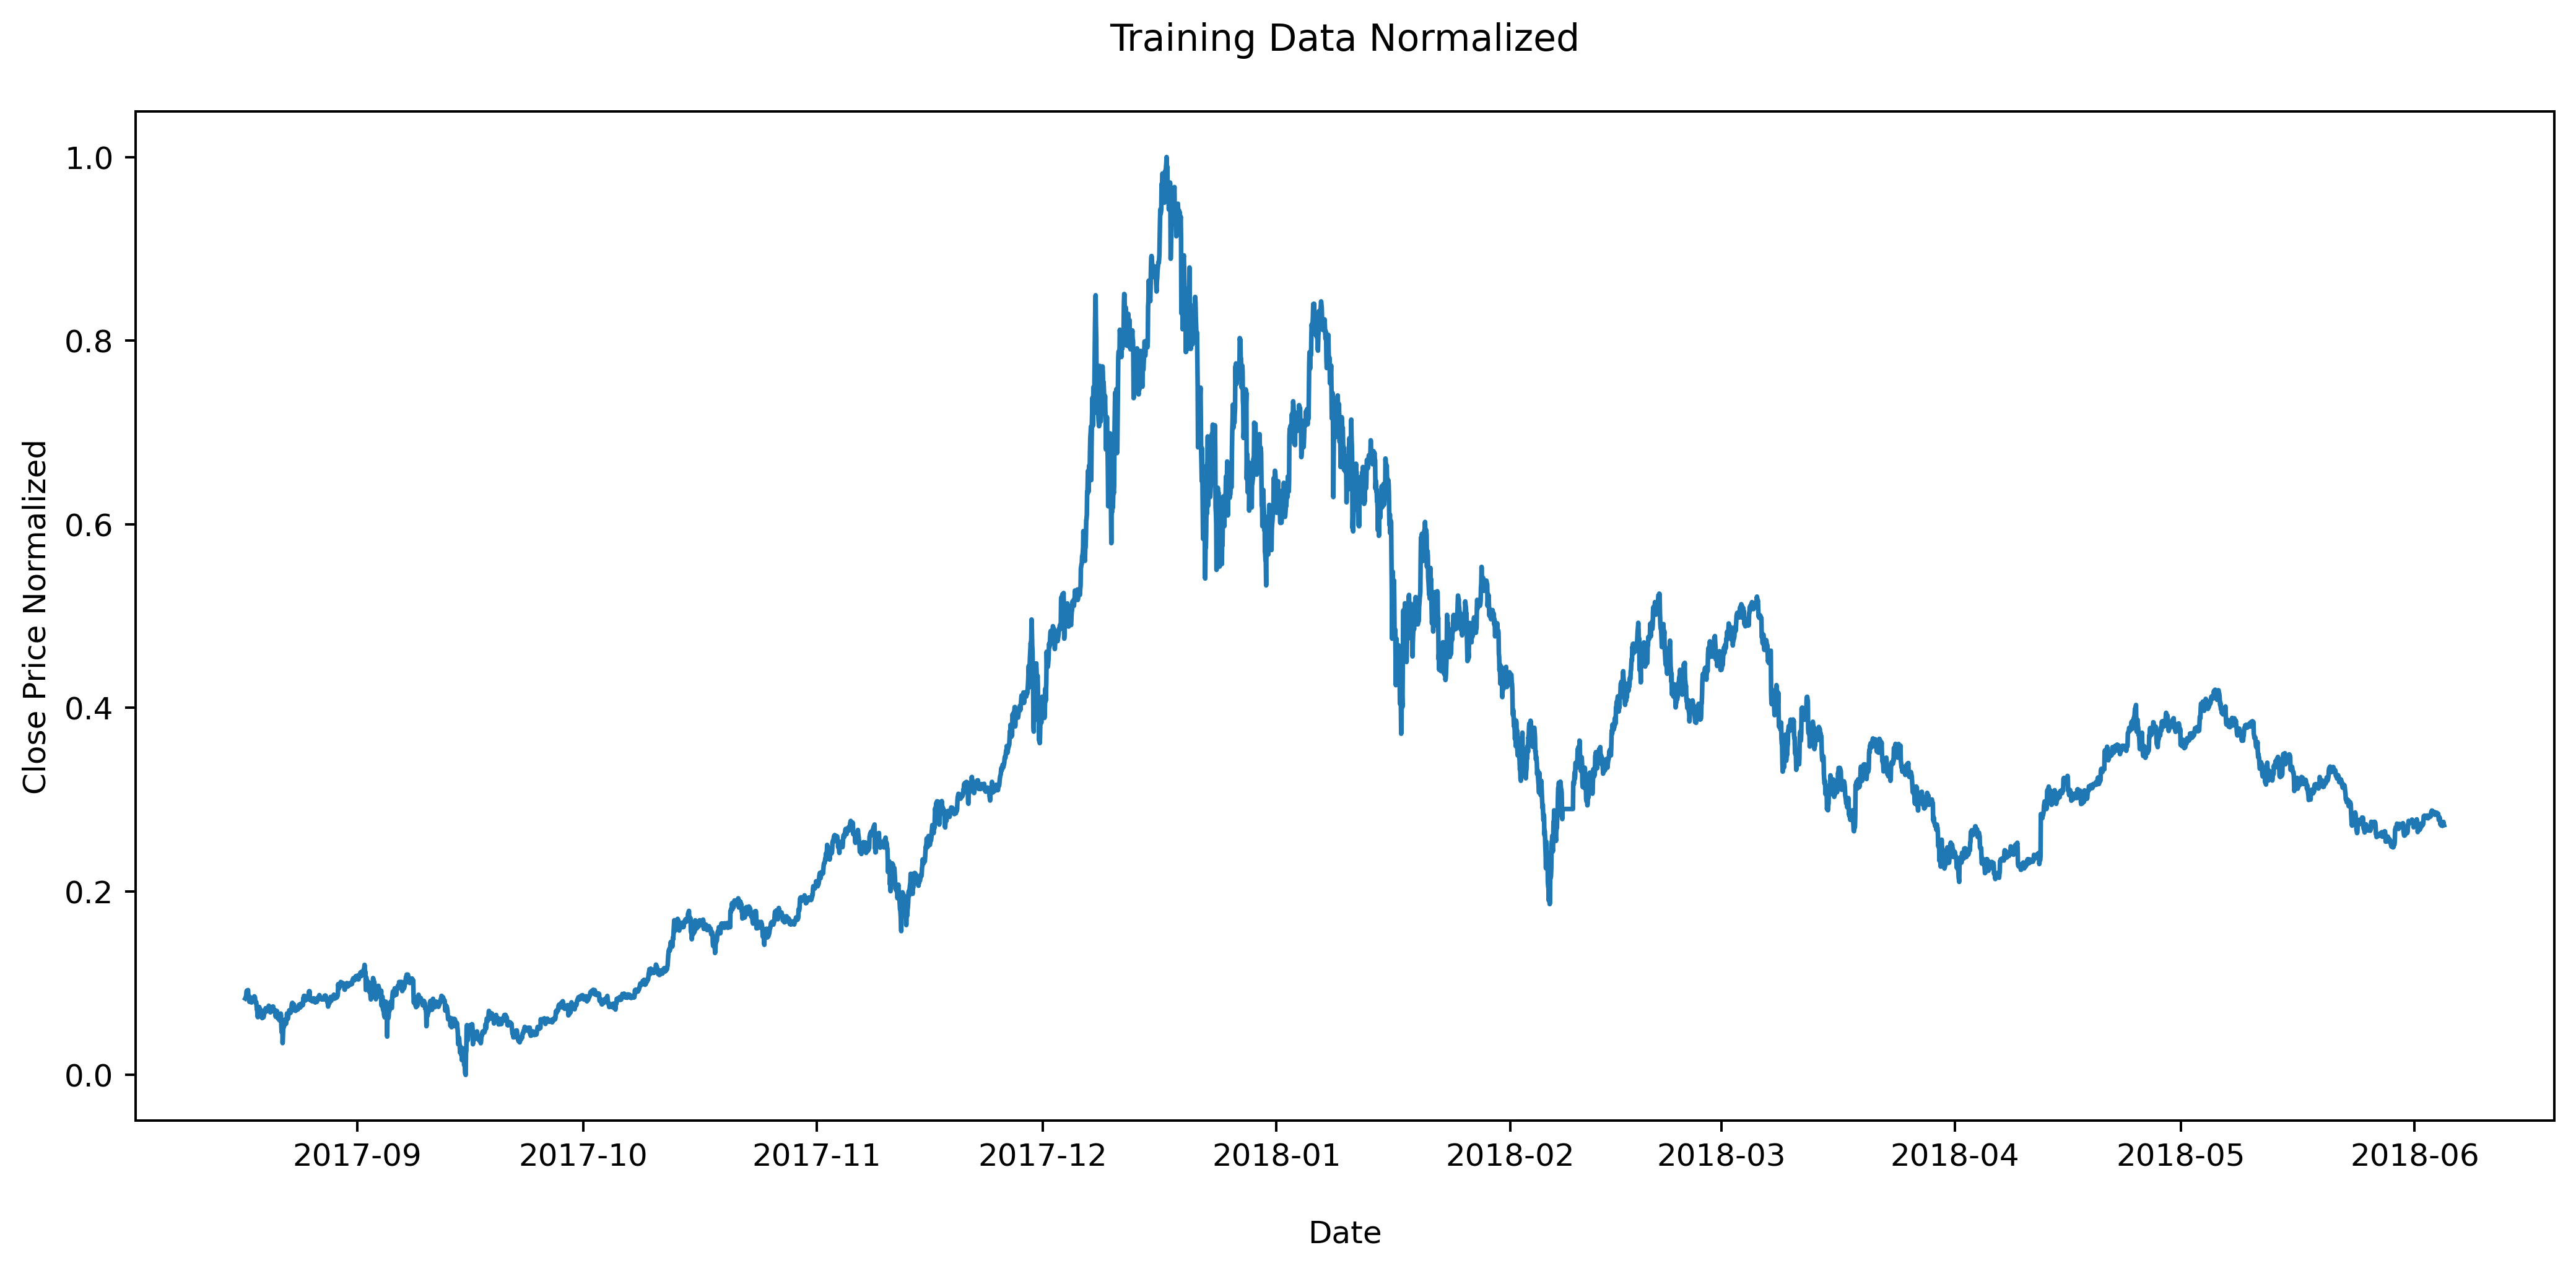

In [ ]:
fig = plt.figure(figsize=(14, 6))
dataset_train= df_norm.iloc[:train_size]
plt.plot(dataset_train.Close)
plt.xlabel('\nDate')
plt.ylabel('Close Price Normalized')
plt.title('Training Data Normalized\n')
plt.show()

**Plotting Normalized Validation Data**

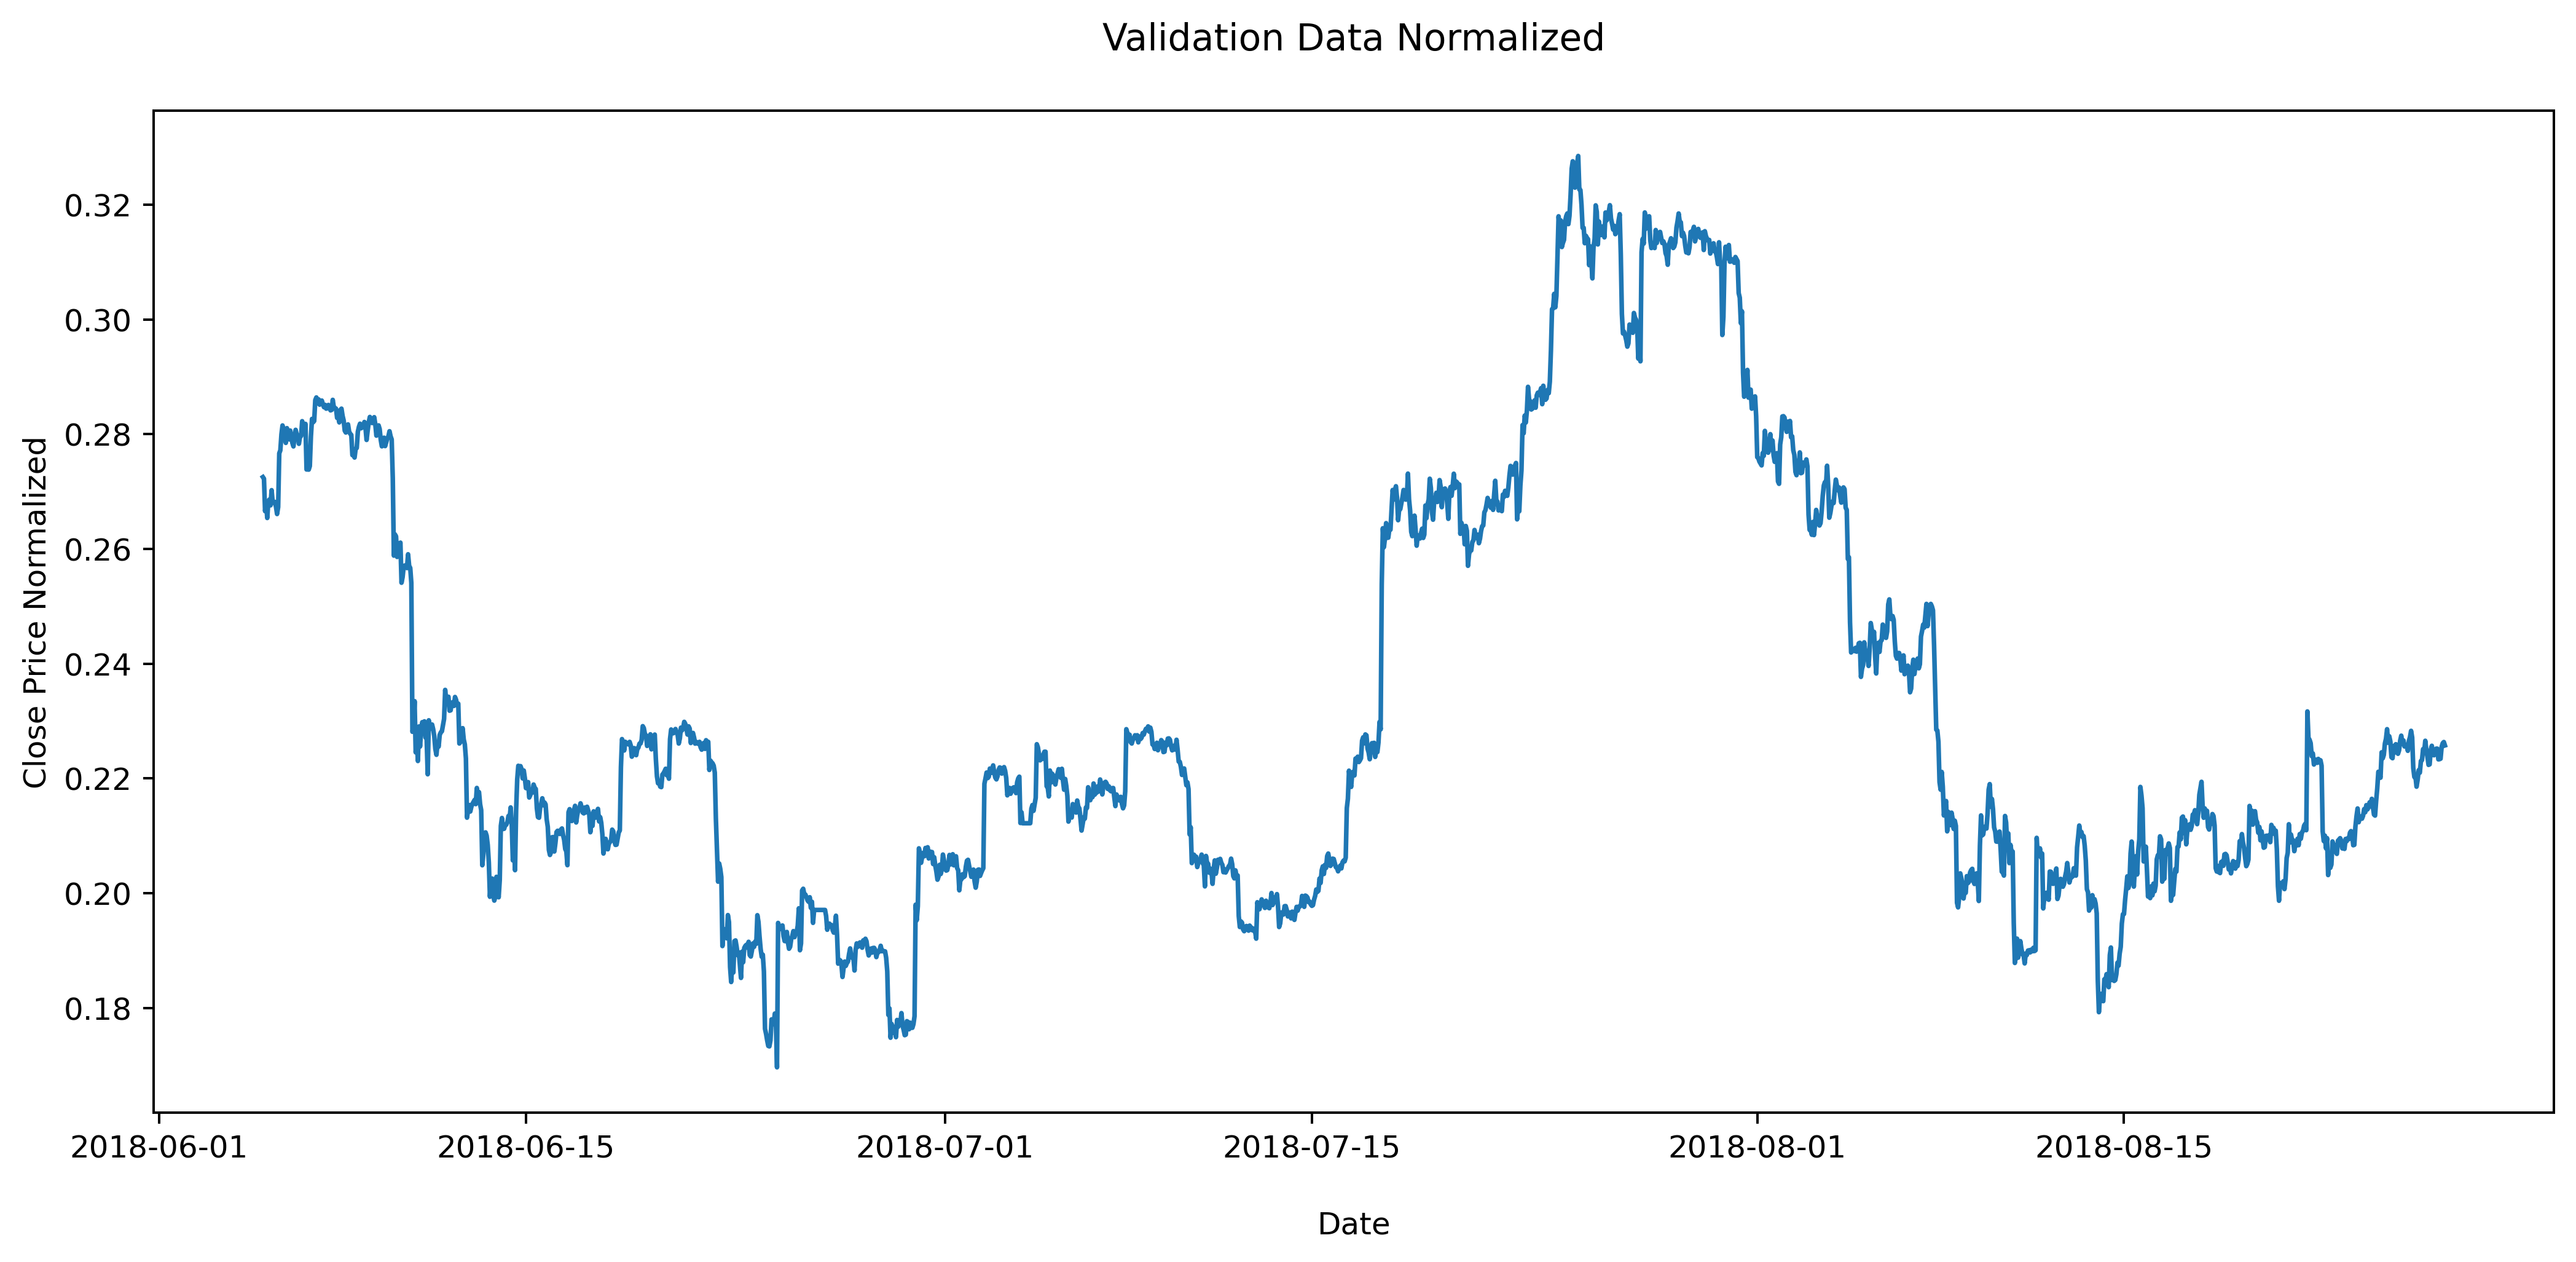

In [ ]:
fig = plt.figure(figsize=(14, 6))
dataset_validation= df_norm.iloc[train_size:validation_size]
plt.plot(dataset_validation.Close)
plt.xlabel('\nDate')
plt.ylabel('Close Price Normalized')
plt.title('Validation Data Normalized\n')
plt.show()

**Plotting Normalized Testing Data**

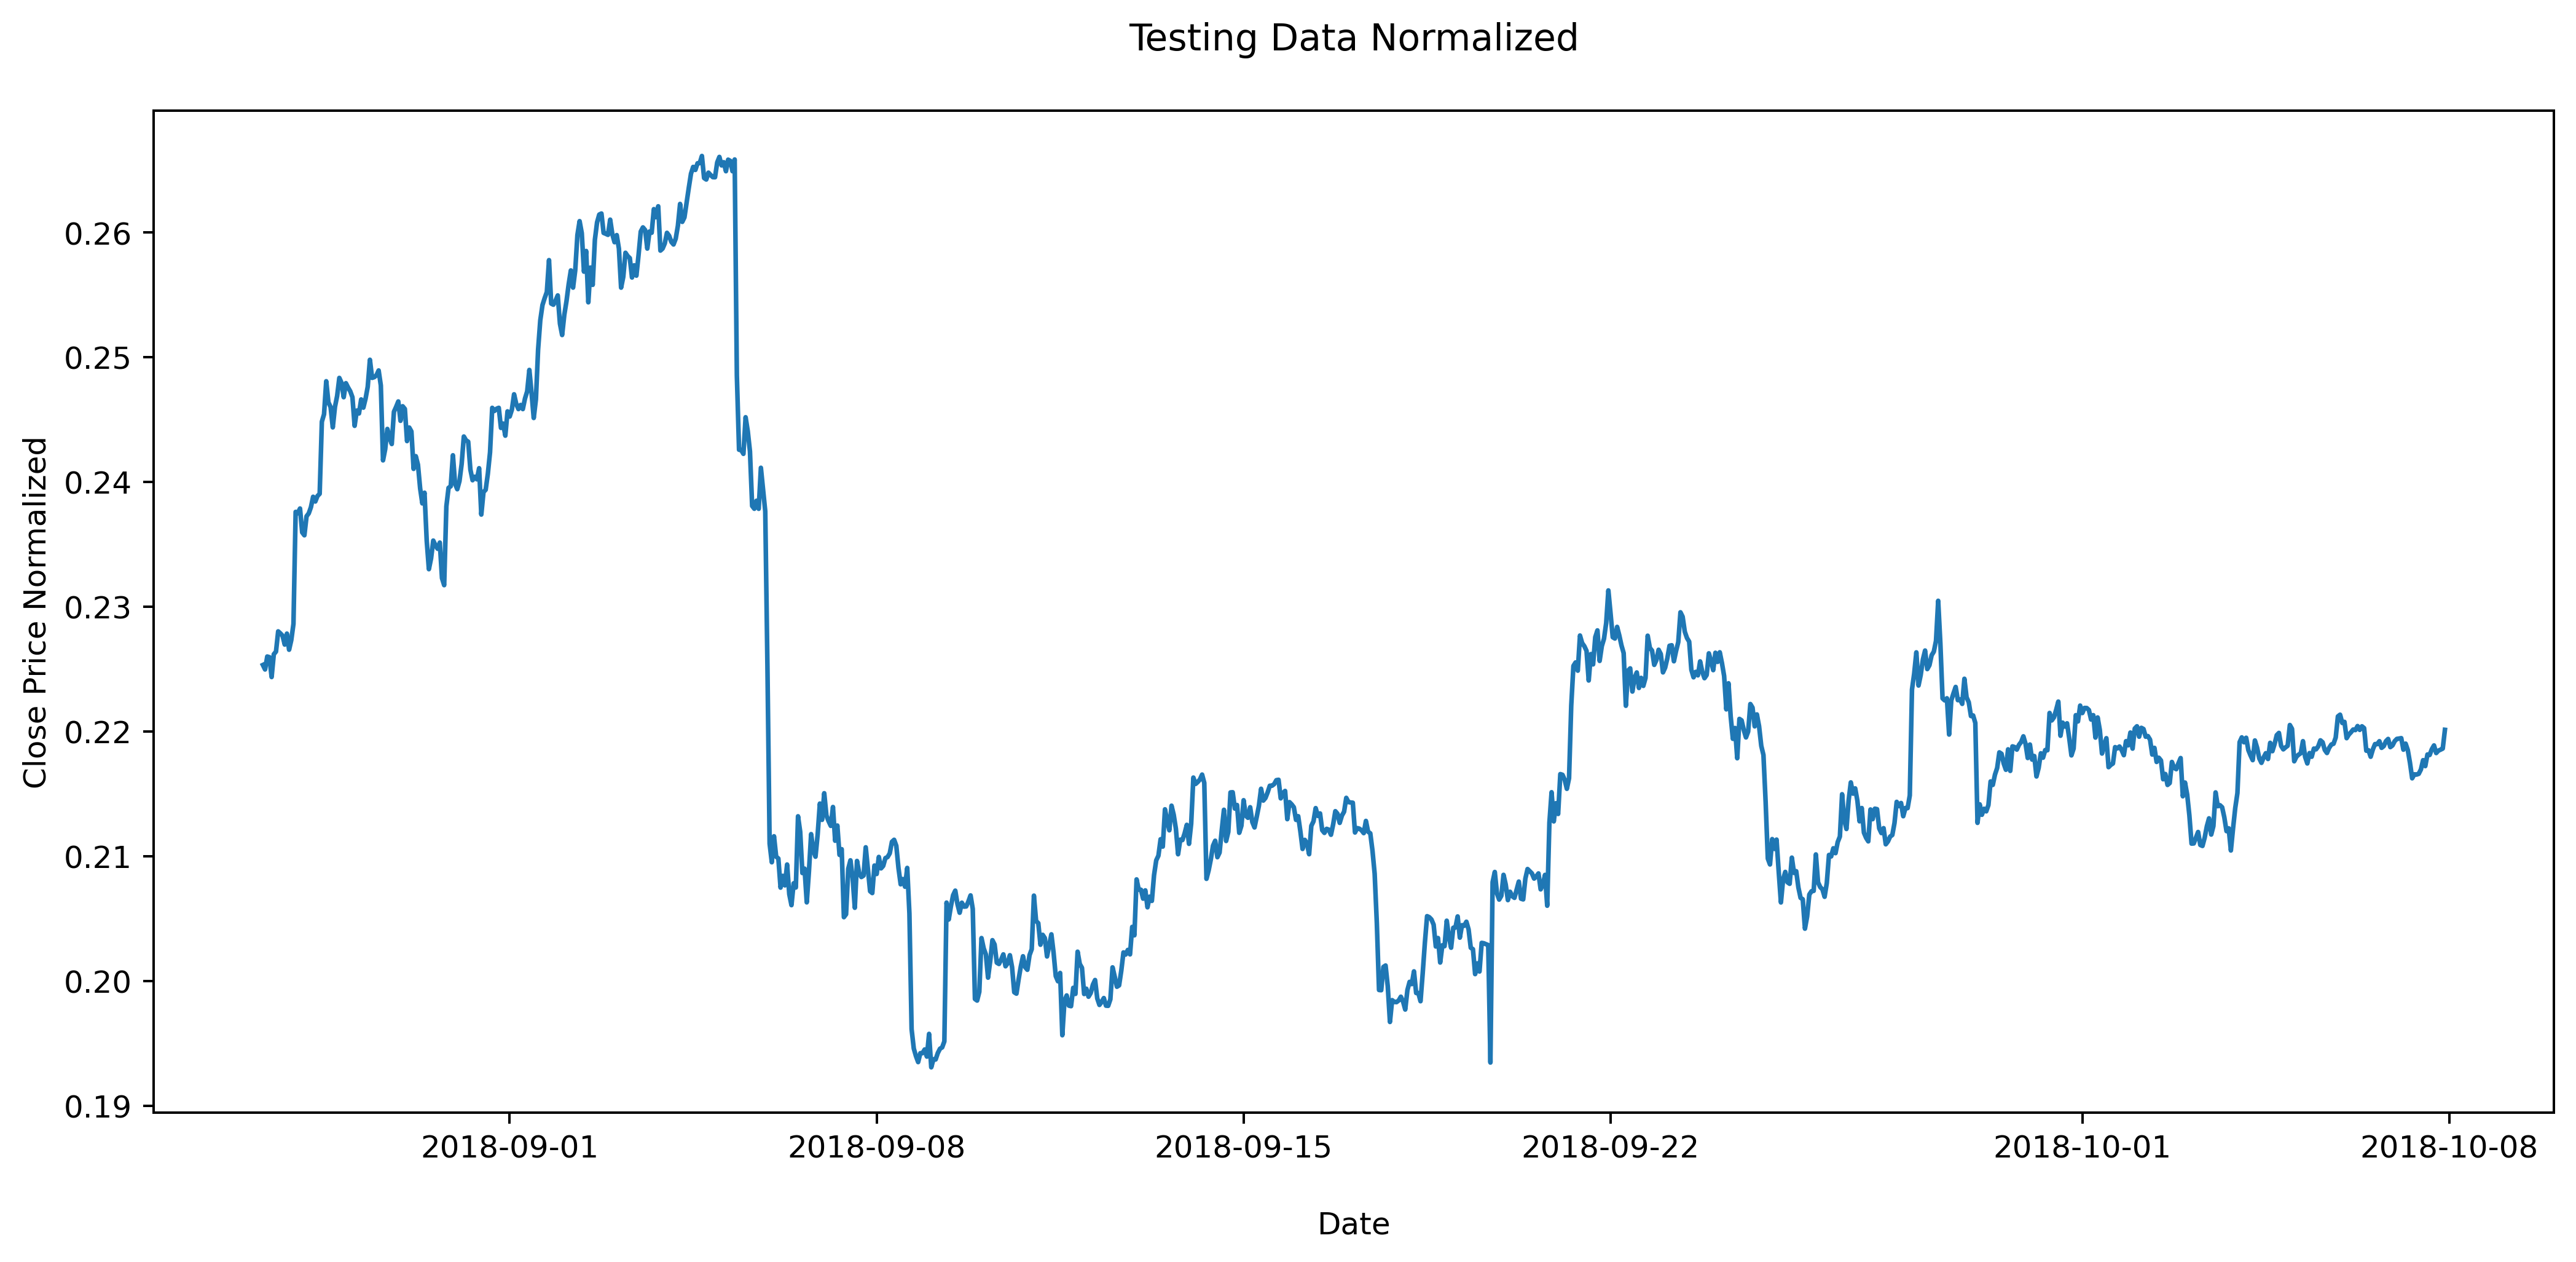

In [ ]:
fig = plt.figure(figsize=(14, 6))
dataset_test = df_norm.iloc[validation_size:]
plt.plot(dataset_test.Close)
plt.xlabel('\nDate')
plt.ylabel('Close Price Normalized')
plt.title('Testing Data Normalized\n')
plt.show()